<a href="https://colab.research.google.com/github/Jdean4747/Data5600HW/blob/main/PenalizedRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('/content/wage_regularization.csv')

In [25]:
scaler = StandardScaler()
x = df.drop(columns=['wage'])
y = df['wage']
x_scaled = scaler.fit_transform(x)
df_sc = pd.DataFrame(x_scaled, columns=x.columns)
df_sc['wage'] = y
x_scaled = df_sc.drop(columns=['wage'])
y_scaled = df_sc['wage']
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)

In [26]:
x_trainols = sm.add_constant(x_train)
model = sm.OLS(y_train, x_trainols)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     11.67
Date:                Wed, 19 Feb 2025   Prob (F-statistic):           8.88e-19
Time:                        06:20:32   Log-Likelihood:                -10669.
No. Observations:                 748   AIC:                         2.136e+04
Df Residuals:                     737   BIC:                         2.141e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.634e+05    1.4e+04     68.900      0.000    9.36e+05    9.91e+05
educ         2.33e+07   8.18e+07      0.285      0.776   -1.37e+08    1.84e+08
educ2      -1.151e+08   3.49e+08     -0.330      0.742   -8.01e+08     5.7e+08
educ3       2.098e+08   5.65e+08      0.372      0.710   -8.99e+08    1.32e+09
educ4      -1.669e+08   4.09e+08     -0.408      0.683    -9.7e+08    6.36e+08
educ5       4.902e+07   1.12e+08      0.438      0.662   -1.71e+08    2.69e+08
age        -1.212e+09   1.73e+09     -0.698      0.485   -4.62e+09    2.19e+09
age2        4.804e+09   7.05e+09      0.681      0.496   -9.04e+09    1.87e+10
age3       -7.175e+09   1.08e+10     -0.665      0.507   -2.84e+10     1.4e+10
age4        4.785e+09   7.37e+09      0.649      0.517   -9.69e+09    1.93e+10
age5       -1.202e+09   1.89e+09     -0.635      0.526   -4.92e+09    2.52e+09
==============================================================================
Omnibus:                      196.307   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              604.182
Skew:                           1.266   Prob(JB):                    6.36e-132
Kurtosis:                       6.602   Cond. No.                     2.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-squared value is 0.137 which means there is not a lot of variance in the data. There are no statistically significant variables because there is none under 0.05 P-value.

In [27]:
lin = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic = ElasticNet()

lin.fit(x_train, y_train)
y_pred = lin.predict(x_test)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
elastic.fit(x_train, y_train)
y_pred_elastic = elastic.predict(x_test)

In [28]:
df_predictions = pd.DataFrame({'Actual': y_test, 'Linear': y_pred, 'Ridge': y_pred_ridge, 'Lasso': y_pred_lasso, 'Elastic': y_pred_elastic})
df_predictions

,Actual,Linear,Ridge,Lasso,Elastic
321,714000.0,9.405398e+05,9.482910e+05,9.479404e+05,9.441244e+05
70,1455000.0,1.218014e+06,1.196877e+06,1.200210e+06,1.136190e+06
209,865000.0,7.602653e+05,8.112579e+05,8.099733e+05,8.367635e+05
549,1154000.0,7.572436e+05,7.907846e+05,7.883476e+05,8.245880e+05
712,905000.0,9.405398e+05,9.482910e+05,9.479404e+05,9.441244e+05
...,...,...,...,...,...
464,1000000.0,8.614305e+05,8.642210e+05,8.618923e+05,9.039973e+05
845,950000.0,8.318522e+05,8.274892e+05,8.265340e+05,8.688913e+05
2,825000.0,1.074348e+06,1.027415e+06,1.031854e+06,9.715708e+05
723,1200000.0,9.627843e+05,9.663416e+05,9.685627e+05,9.306765e+05


In [29]:
coefficients = pd.DataFrame({'Variable': x_train.columns, 'Linear': lin.coef_, 'Ridge': ridge.coef_, 'Lasso': lasso.coef_, 'Elastic': elastic.coef_})
coefficients

,Variable,Linear,Ridge,Lasso,Elastic
0,educ,2.329500e+07,60536.391529,-7327.142554,34218.241392
1,educ2,-1.150963e+08,156674.740189,301690.644973,29217.764625
2,educ3,2.098457e+08,123171.056703,91355.896036,23899.797504
3,educ4,-1.669341e+08,-7382.757716,-69649.164533,18454.920817
4,educ5,4.902068e+07,-203933.407581,-187494.206764,13039.886598
5,age,-1.211519e+09,11938.369633,-1530.514017,10366.521838
6,age2,4.803770e+09,46380.357837,87352.784791,10014.121002
7,age3,-7.175498e+09,44909.213491,36957.730214,9556.902838
8,age4,4.785459e+09,10522.504008,-8628.246459,9007.196623
9,age5,-1.202176e+09,-53338.142486,-53309.505864,8378.312770


Lasso and Elastic shrink coefficients that are less important so that they can basically eliminate them from the model.

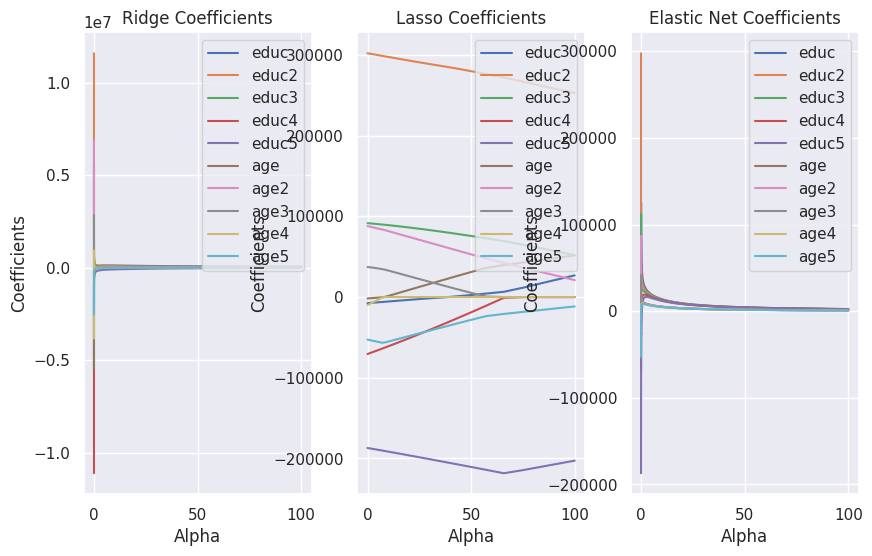

<Figure size 640x480 with 0 Axes>

In [30]:
alphas = 10**np.linspace(-4,2,100)
ridge_coefs = []
lasso_coefs = []
elastic_coefs = []
for alpha in alphas:
  ridge = Ridge(alpha=alpha)
  ridge.fit(x_train, y_train)
  ridge_coefs.append(ridge.coef_)
  lasso = Lasso(alpha=alpha)
  lasso.fit(x_train, y_train)
  lasso_coefs.append(lasso.coef_)
  elastic = ElasticNet(alpha=alpha)
  elastic.fit(x_train, y_train)
  elastic_coefs.append(elastic.coef_)

plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
plt.plot(alphas, ridge_coefs)
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Ridge Coefficients')
plt.legend(x.columns, loc='upper right')
plt.subplot(1,3,2)
plt.plot(alphas, lasso_coefs)
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso Coefficients')
plt.legend(x.columns, loc='upper right')
plt.subplot(1,3,3)
plt.plot(alphas, elastic_coefs)
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Elastic Net Coefficients')
plt.legend(x.columns, loc='upper right')
plt.show()

plt.tight_layout()
plt.show()


Ridge: Educ 2 and Age 2 drop the most between 0.0001 and 10

Lasso: Educ 2 and Educ 3 are the top two variables with Alpha at 0.1

In [34]:
grid = {'alpha': alphas}
ridge_cv = GridSearchCV(Ridge(), grid, cv=5)
ridge_cv.fit(x_train, y_train)
best_alpha_ridge = ridge_cv.best_params_['alpha']
lasso_cv = GridSearchCV(Lasso(), grid, cv=5)
lasso_cv.fit(x_train, y_train)
best_alpha_lasso = lasso_cv.best_params_['alpha']
elastic_cv = GridSearchCV(ElasticNet(), grid, cv=5)
elastic_cv.fit(x_train, y_train)
best_alpha_elastic = elastic_cv.best_params_['alpha']

In [35]:
ridge_opt = Ridge(alpha=best_alpha_ridge).fit(x_train, y_train)
lasso_opt = Lasso(alpha=best_alpha_lasso).fit(x_train, y_train)
elastic_net_opt = ElasticNet(alpha=best_alpha_elastic).fit(x_train, y_train)
df_predictions_optimal = pd.DataFrame({'Actual': y_test, 'Linear': y_pred, 'Ridge': y_pred_ridge, 'Lasso': y_pred_lasso, 'Elastic': y_pred_elastic})
df_predictions_optimal

,Actual,Linear,Ridge,Lasso,Elastic
321,714000.0,9.405398e+05,9.482910e+05,9.479404e+05,9.441244e+05
70,1455000.0,1.218014e+06,1.196877e+06,1.200210e+06,1.136190e+06
209,865000.0,7.602653e+05,8.112579e+05,8.099733e+05,8.367635e+05
549,1154000.0,7.572436e+05,7.907846e+05,7.883476e+05,8.245880e+05
712,905000.0,9.405398e+05,9.482910e+05,9.479404e+05,9.441244e+05
...,...,...,...,...,...
464,1000000.0,8.614305e+05,8.642210e+05,8.618923e+05,9.039973e+05
845,950000.0,8.318522e+05,8.274892e+05,8.265340e+05,8.688913e+05
2,825000.0,1.074348e+06,1.027415e+06,1.031854e+06,9.715708e+05
723,1200000.0,9.627843e+05,9.663416e+05,9.685627e+05,9.306765e+05


In [39]:
rmse_results = {"Linear": np.sqrt(mean_squared_error(y_test, y_pred)),"Ridge": np.sqrt(mean_squared_error(y_test, ridge_opt.predict(x_test))),"Lasso": np.sqrt(mean_squared_error(y_test, lasso_opt.predict(x_test))),"ElasticNet": np.sqrt(mean_squared_error(y_test, elastic_net_opt.predict(x_test)))}
sorted(rmse_results.items(), key=lambda x: x[1])

[('Ridge', 355829.3130061302),
 ('ElasticNet', 355995.4154740221),
 ('Lasso', 356940.8709439305),
 ('Linear', 360916.8727585564)]

In [41]:
rmse_values = {'Ridge': 355829.3130061302,'ElasticNet': 355995.4154740221,'Lasso': 356940.8709439305,'Linear': 360916.8727585564}
max_rmse = max(rmse_values.values())
normalized_rmse = {model: rmse / max_rmse for model, rmse in rmse_values.items()}
normalized_rmse

{'Ridge': 0.985903790771706,
 'ElasticNet': 0.9863640143866962,
 'Lasso': 0.9889836078201706,
 'Linear': 1.0}